In [505]:
def cal_kl(P, Q):
    _kl = torch.sum(P * (P.log() - Q.log()), [-1, -2])
    return  _kl

def cal_js( P, Q):
    P = P.softmax(-1)
    Q = Q.softmax(-1)
    M = (P + Q)/2
    divergence1 = cal_kl( P, M )
    divergence2 = cal_kl( Q, M )
    js = 0.5 * divergence1 + 0.5 * divergence2
    return js

def cal_simaler(x, m): # x [ B, C] attn [nums, B, C]
    js_score_list = []
    C, B, WH = m.shape
    attn_obj_re = x.repeat(C,1,1)
    js_s = cal_js( attn_obj_re, m )
    # print(js_s.shape)
    js_score_list = torch.stack( [ torch.arange(C), js_s], 1)
    return sorted(js_score_list, key = lambda x:x[-1], reverse = True) # from big to small 


In [506]:
attn = torch.randn((2048, 6, 2048)) 
attn1 = torch.randn((6, 2048)) 

In [508]:
for i in range(6):
    cal_simaler(attn1, attn)

# asd

In [411]:
from torch import nn
import torch.nn.functional as F

def cal_kl(M, Q):
    return F.kl_div( M.softmax(-1).log(), Q.softmax(-1), reduction='sum')

def cal_kl_2(M, Q):
    return  torch.sum(Q * torch.log(Q / M), [ -1, -2])

def cal_js( P, Q):
    M = (P + Q)/2
    divergence1 = cal_kl_2(M, Q)
    divergence2 = cal_kl_2(M, P)
    js = 0.5 * divergence1 + 0.5 * divergence2
    return js

def cal_simaler(x, m): # x [ B, C] attn [C, B, C]
    js_score_list = []
    C, B, C = m.shape
    attn_obj_re = x.repeat(C,1,1)
    
    #     for attn_obj_index in range(m.size(0)):
    #         attn_obj = m[ attn_obj_index ]
    #         js_score_list.append([ attn_obj_index, cal_js(x, attn_obj)])

    js_s = cal_js( attn_obj_re, m )
    js_score_list = torch.stack( [ torch.arange(C), js_s], 1)
    
    return sorted(js_score_list, key = lambda x:x[-1], reverse = True) # from big to small 


In [409]:
attn = torch.randn((2048, 6, 2048)) 
attn1 = torch.randn((6, 2048)) 

In [412]:
for i in range(6):
    ans = cal_simaler(attn1, attn)

In [324]:
attn = torch.randn((1, 6, 2048)) 
attn1 = torch.randn((1, 6, 2048)) 

In [325]:
crs(attn, attn1), F.kl_div(attn.softmax(-1).log(), attn1.softmax(-1), reduction='sum')

(tensor(-0.1258), tensor(5.9950))

In [343]:
attn_all.shape, attn_obj.shape

(torch.Size([2048, 6, 2048]), torch.Size([6, 2048]))

In [371]:
attn_all[0].shape

torch.Size([6, 2048])

In [358]:
attn_obj_re = attn_obj.repeat(2048,1,1)
attn_obj_re.shape

torch.Size([2048, 6, 2048])

In [359]:
px = attn_all.softmax(-1)
py = attn_obj_re.softmax(-1)

In [374]:
ans = torch.sum(px * torch.log(px/ py),[-1,-2])
ans

tensor([5.9545, 5.9391, 6.0895,  ..., 6.1186, 6.0746, 5.8726])

In [375]:
ans_list[-1]

tensor(5.9046)

In [337]:
px = attn.squeeze().softmax(-1)
py = attn1.squeeze().softmax(-1)
KL = 0.0
for i in range(6):
    KL += torch.sum(px[i] * torch.log(px[i] / py[i]))

torch.sum(px * torch.log(px/ py),1)

(tensor([1.0268, 0.9574, 0.9841, 1.0221, 0.9100, 1.0084]),
 tensor(5.9087),
 tensor(5.9087))

In [334]:
(px * torch.log(px/ py)).shape

torch.Size([6, 2048])

In [327]:
px = attn.softmax(-1)
py = attn1.softmax(-1)
KL = 0.0
for i in range(1):
    KL += torch.sum(px[i] * torch.log(px[i] / py[i]))
KL

tensor(5.9087)

In [256]:
p = attn
q = attn1
loss_pointwise = p *(p.softmax(-1).log() - q.softmax(-1))
loss = loss_pointwise.sum(dim=-1).mean()
loss

tensor(1.0015)

In [1]:
import torch

E:\anaconda\envs\DSIM\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [132]:
attn = torch.randn((6, 2048, 2048)) 
f = torch.ones((6,2048,196))

In [20]:
x = torch.bmm(attn_class, f)
x.shape

torch.Size([6, 6, 196])

In [194]:
b, c, hw  = attn.shape
nums = 6
parts_id = torch.tensor([ 2,4,256, 1024, 56, 1454])

In [135]:
torch.arange(b)

tensor([0, 1, 2, 3, 4, 5])

In [147]:
attn.shape, parts_id

(torch.Size([6, 2048, 2048]), tensor([   2,    4,  256, 1024,   56, 1454]))

In [161]:
attn_class = attn[:, parts_id, :].permute( 1, 0, 2)
attn_class.shape

torch.Size([6, 6, 2048])

In [162]:
attn_backup = attn_class.clone().detach()

In [209]:
attn.permute(1,0,2).shape, attn_class.shape

(torch.Size([2048, 6, 2048]), torch.Size([6, 6, 2048]))

In [191]:
attn_all = attn.permute(1,0,2)
attn_all.shape

torch.Size([2048, 6, 2048])

In [198]:
attn.shape

torch.Size([6, 2048, 2048])

In [212]:
for i in range(b):
    attn_obj = attn_class[i,:,:]
    cal_simaler(attn_obj, attn.permute(1,0,2) )
#     print(attn_obj.flatten(-2).shape)
#     print(attn_obj.shape)
#     for j in range(nums):
#         attn_c = attn_obj[j]
#         cal_simaler(attn_c, attn[i,:,:]  )

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
done
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size

In [187]:
attn_class.flatten(-2).shape, attn_all.flatten(-2).shape

(torch.Size([6, 12288]), torch.Size([2048, 12288]))

In [188]:
for i in attn_class:
    print(i.shape)

torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])
torch.Size([6, 2048])


In [165]:
attn_class_obj

6

In [ ]:
# attn_class = attn[torch.arange(b)[:, None], parts_id, :]     #(B,nums,C)
# 
attn_backup = attn_class.clone().detach()
for attn_index in range(attn_class.size(1)):
    attn_class_obj = attn_class[:, attn_index, :].clone().detach()
    score_list = cal_simaler( attn_class_obj, attn.permute(1,0,2)) 
    for index in score_list[: self.nums + 1]:
        attn_class_obj = attn_class_obj + attn[:, index[0], :] * self.alpha
    attn_backup[ :, attn_index, :] = attn_class_obj
attn = attn_backup 

# erode


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch.nn as nn
Pool = nn.MaxPool2d

In [3]:
class MinPool(nn.Module):
    def __init__(self, kernel_size, ndim=2, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False):
        super(MinPool, self).__init__()
        self.pool = getattr(nn, f'MaxPool{ndim}d')(kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation,
                                                  return_indices=return_indices, ceil_mode=ceil_mode)
    def forward(self, x):
        x = self.pool(-x)
        return -x

In [505]:
lower_green = np.array([35, 110, 106]) # 绿色范围低阈值
upper_green = np.array([77, 255, 255]) # 绿色范围高阈值
lower_red = np.array([0, 110, 110]) # 红色范围低阈值
upper_red = np.array([10, 255, 255]) # 红色范围高阈值

class HSVHotMap(nn.Module):
    def __init__(self, lower_red = [0, 110, 110], upper_red = [14, 255, 255] ,eps=1e-8):
        super(HSVHotMap, self).__init__()
        self.eps = eps
        self.lower_red = lower_red
        self.upper_red = upper_red
        self.kernel = 10
        self.dilate = nn.MaxPool2d(self.kernel, stride = 1)
        self.kernel -= 1

    def rgb_to_hsv(self, img):
        hue = torch.Tensor(img.shape[0], img.shape[2], img.shape[3]).to(img.device)
        hue[ img[:,2]==img.max(1)[0] ] = 4.0 + ( (img[:,0]-img[:,1]) / ( img.max(1)[0] - img.min(1)[0] + self.eps) ) [ img[:,2]==img.max(1)[0] ]
        hue[ img[:,1]==img.max(1)[0] ] = 2.0 + ( (img[:,2]-img[:,0]) / ( img.max(1)[0] - img.min(1)[0] + self.eps) ) [ img[:,1]==img.max(1)[0] ]
        hue[ img[:,0]==img.max(1)[0] ] = (0.0 + ( (img[:,1]-img[:,2]) / ( img.max(1)[0] - img.min(1)[0] + self.eps) ) [ img[:,0]==img.max(1)[0] ]) % 6

        hue[img.min(1)[0]==img.max(1)[0]] = 0.0
        hue = hue/6
        saturation = ( img.max(1)[0] - img.min(1)[0] ) / ( img.max(1)[0] + self.eps )
        saturation[ img.max(1)[0]==0 ] = 0
        value = img.max(1)[0]
        hue = hue.unsqueeze(1)
        saturation = saturation.unsqueeze(1)
        value = value.unsqueeze(1)
        hsv = torch.cat([hue, saturation, value],dim=1)
        return hsv

    def filter_out_red_torch(self, torch_image):
        hsv_back = torch_image.permute( 0, 2, 3, 1) * 255
        mask = (hsv_back[:, :, :, 0] >= self.lower_red[0]) * (hsv_back[:, :, :, 1] >= self.lower_red[1]) * (hsv_back[:, :, :, 2] >= self.lower_red[2])
        mask2 = (hsv_back[:, :, :, 0] < self.upper_red[0]) * (hsv_back[:, :, :, 1] <= self.upper_red[1]) * (hsv_back[:, :, :, 2] <= self.upper_red[2])
        
        #         mask = (hsv_back[:,:,:,0] >= 0) * (hsv_back[:,:,:,1] >= 110) * (hsv_back[:,:,:,2] >= 110)
        #         mask2 = (hsv_back[:,:,:,0] < 14) * (hsv_back[:, :,:,1] <= 255) * (hsv_back[:,:,:,2] <= 255)

        mask *= mask2
        print(hsv_back.shape, mask.shape)
        return mask.to(torch.float32)
    
    def hsv_to_rgb(self, hsv):
        h,s,v = hsv[:,0,:,:],hsv[:,1,:,:],hsv[:,2,:,:]
        #对出界值的处理
        h = h%1
        s = torch.clamp(s,0,1)
        v = torch.clamp(v,0,1)
  
        r = torch.zeros_like(h)
        g = torch.zeros_like(h)
        b = torch.zeros_like(h)
        
        hi = torch.floor(h * 6)
        f = h * 6 - hi
        p = v * (1 - s)
        q = v * (1 - (f * s))
        t = v * (1 - ((1 - f) * s))
        
        hi0 = hi==0
        hi1 = hi==1
        hi2 = hi==2
        hi3 = hi==3
        hi4 = hi==4
        hi5 = hi==5
        
        r[hi0] = v[hi0]
        g[hi0] = t[hi0]
        b[hi0] = p[hi0]
        
        r[hi1] = q[hi1]
        g[hi1] = v[hi1]
        b[hi1] = p[hi1]
        
        r[hi2] = p[hi2]
        g[hi2] = v[hi2]
        b[hi2] = t[hi2]
        
        r[hi3] = p[hi3]
        g[hi3] = q[hi3]
        b[hi3] = v[hi3]
        
        r[hi4] = t[hi4]
        g[hi4] = p[hi4]
        b[hi4] = v[hi4]
        
        r[hi5] = v[hi5]
        g[hi5] = p[hi5]
        b[hi5] = q[hi5]
        
        r = r.unsqueeze(1)
        g = g.unsqueeze(1)
        b = b.unsqueeze(1)
        rgb = torch.cat([r, g, b], dim=1)
        return rgb

    def build_mask(self, x):
        print("in:", x.shape)
        x = self.rgb_to_hsv(x)
        print("filter_out_red_torch:", x.shape)
        mask = self.filter_out_red_torch(x)
        mask = nn.functional.pad(mask, (0,self.kernel, 0, self.kernel))
        mask = dilate(mask)
        mask = nn.functional.pad(mask, (self.kernel,0, self.kernel, 0))
        mask = dilate(mask)
        return mask.unsqueeze(1)
    
    @torch.no_grad()
    def show(self, origin, mask):  
        origin = origin.permute(1,2,0)
        mask = mask.permute(1,2,0)
        plt.figure(figsize=(12,24))
        plt.subplot(311)
        plt.imshow(mask.squeeze().numpy())
        plt.subplot(312)
        a = (origin * mask.repeat(1,1,3))
        plt.imshow( np.array(255 * a.squeeze().numpy(), dtype = np.uint8) )
        plt.subplot(313)
        plt.imshow(origin.squeeze().numpy() )
        plt.show()

    def forward(self, x):
        return self.build_mask(x)
    
def filter_out_black(src_frame):
    if src_frame is not None:
        hsv = cv2.cvtColor(src_frame, cv2.COLOR_BGR2HSV)
        # lower_red = np.array([0, 0, 0])
        # upper_red = np.array([180, 255, 172])
        # inRange()方法返回的矩阵只包含0,255 (CV_8U) 0表示不在区间内
        mask = cv2.inRange(hsv, lower_red, upper_red)
        return cv2.bitwise_and(src_frame, src_frame, mask=mask)
 
 
def filter_out_red(src_frame):
    if src_frame is not None:
        hsv = cv2.cvtColor(src_frame, cv2.COLOR_BGR2HSV)
        # lower_red = np.array([156, 43, 46])
        # upper_red = np.array([180, 255, 255])
        # inRange()方法返回的矩阵只包含0,255 (CV_8U) 0表示不在区间内
        mask = cv2.inRange(hsv, lower_red, upper_red)
        return cv2.bitwise_and(src_frame, src_frame, mask=mask)
    
def filter_out_red_torch(torch_image):
    hsv = pip.rgb_to_hsv( torch_image )
    hsv_back = hsv * 255
    mask = (hsv_back[:,:,0] >= 0) * (hsv_back[:,:,1] >= 110) * (hsv_back[:,:,2] >= 110)
    mask2 = (hsv_back[:,:,0] < 14) * (hsv_back[:,:,1] <= 255) * (hsv_back[:,:,2] <= 255)
    mask *= mask2
    return mask.to(torch.float32)


In [506]:
pipline = HSVHotMap()

In [507]:
from PIL import Image
img1 = Image.open(r"C:\Users\HP\Desktop\train/thick_0074.jpg")
img2 = Image.open(r"C:\Users\HP\Desktop\train/thick_1586.jpg")
torch_image1 = torch.from_numpy(np.array(img1)).permute(2,0,1).unsqueeze(0)/255
torch_image2 = torch.from_numpy(np.array(img2)).permute(2,0,1).unsqueeze(0)/255
print( torch_image1.shape, torch_image2.shape )
batch_image = torch.cat([ torch_image1, torch_image2 ], 0)
print( batch_image.shape )
pip = RGB_HSV()
mask = pipline( batch_image )
print(mask.shape)

torch.Size([1, 3, 907, 1611]) torch.Size([1, 3, 907, 1611])
torch.Size([2, 3, 907, 1611])
in: torch.Size([2, 3, 907, 1611])
filter_out_red_torch: torch.Size([2, 3, 907, 1611])
torch.Size([2, 907, 1611, 3]) torch.Size([2, 907, 1611])
torch.Size([2, 1, 907, 1611])


In [489]:
hsv_torch.shape

torch.Size([1, 3, 907, 1611])

In [493]:
torch.sum(hsv_torch != test)

tensor(0)

In [ ]:
pipline.filter_out_red_torch(x)

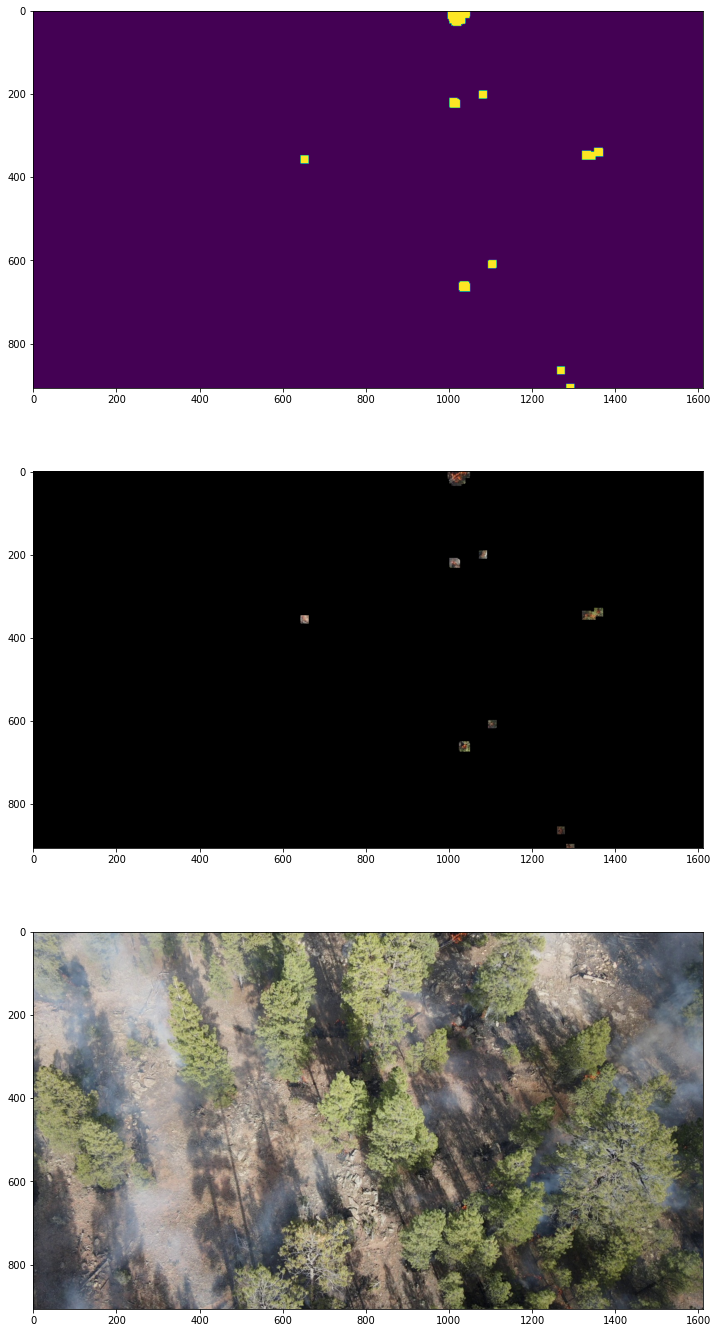

In [510]:
index = 0
pipline.show(batch_image[index], mask[index])

In [292]:
mask.to(torch.bool)

tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]]])

In [290]:
erode = MinPool(2,2,1)
dilate = nn.MaxPool2d(10, stride = 1)
dilate_2 = nn.MaxPool2d(2)

In [460]:
hsv_back = hsv_torch.permute(0,2,3,1)* 255
hsv_back.shape

torch.Size([1, 907, 1611, 3])

In [472]:
mask = (hsv_back[:,:,:,0] >= 0) * (hsv_back[:,:,:,1] >= 110) * (hsv_back[:,:,:,2] >= 110)
mask2 = (hsv_back[:,:,:,0] < 14) * (hsv_back[:, :,:,1] <= 255) * (hsv_back[:,:,:,2] <= 255)
mask *= mask2
mask = torch.tensor(mask, dtype = torch.float32)
mask.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_19676\2732284141.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype = torch.float32)


torch.Size([1, 907, 1611])

In [473]:
i = 9
mask = nn.functional.pad(mask, (0,i, 0, i))
mask = dilate(mask)
mask = nn.functional.pad(mask, (i,0, i, 0))
mask = dilate(mask)
mask.shape

torch.Size([1, 907, 1611])

In [474]:
a = (pic_data *  mask.squeeze().unsqueeze(-1).repeat(1,1,3).numpy())
a.shape

(907, 1611, 3)

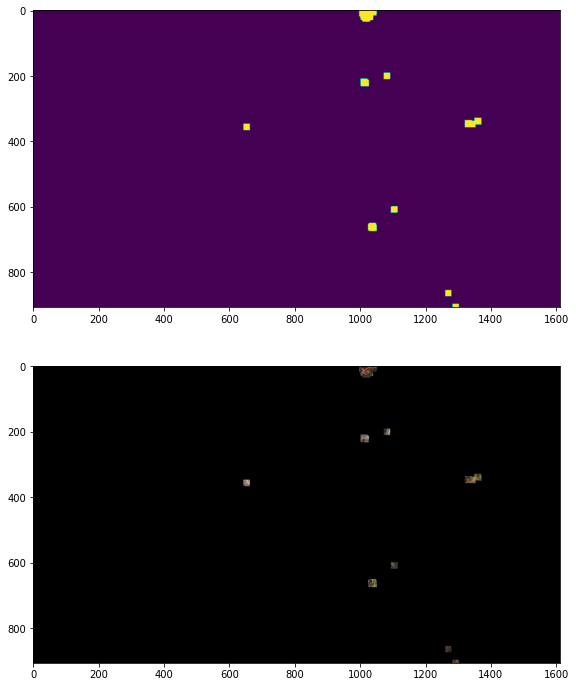

In [466]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(mask.squeeze().numpy())
plt.subplot(212)
plt.imshow( np.array(a, dtype = np.uint8) )
plt.show()

In [458]:

from PIL import Image

img = Image.open(r"C:\Users\HP\Desktop\train/thick_0074.jpg")
pip = RGB_HSV()
torch_image = torch.from_numpy(np.array(img)).permute(2,0,1).unsqueeze(0)/255
torch_image.shape
hsv_torch = pip.rgb_to_hsv( torch_image )
hsv_torch.shape

torch.Size([1, 3, 907, 1611])

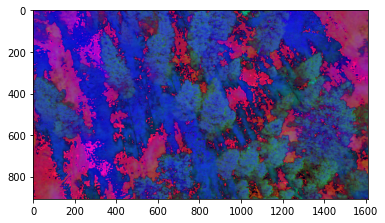

In [203]:
plt.imshow(hsv_torch.squeeze().permute(1,2,0).numpy())
plt.show()

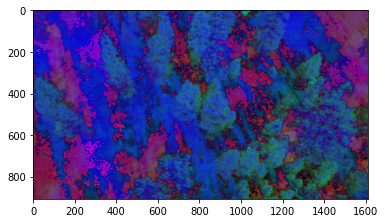

In [143]:
plt.imshow(hsv)
plt.show()

In [170]:
image = cv2.imread(r"C:\Users\HP\Desktop\train/thick_0074.jpg")
pic_data = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv.shape

(907, 1611, 3)

In [97]:
torch_image = torch.from_numpy(np.array(img)).permute(2,0,1).unsqueeze(0)
torch_image.shape

torch.Size([1, 3, 907, 1611])

In [117]:
hsv = pip.rgb_to_hsv( torch_image )
hsv.shape

torch.Size([1, 3, 907, 1611])

In [17]:
mask = filter_out_red(image)
mask_tensor = torch.from_numpy(mask).to(torch.float32).permute(2, 0, 1)
mask_tensor = nn.functional.pad(mask_tensor, (1, 0, 1, 0))
mask_dilated = dilate(mask_tensor)
print(mask_tensor.shape, mask_dilated.shape)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
# mask = cv2.dilate(mask.copy(), kernel, 10)
# mask = cv2.dilate(mask.copy(), kernel, 10)

torch.Size([3, 908, 1612]) torch.Size([3, 899, 1603])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


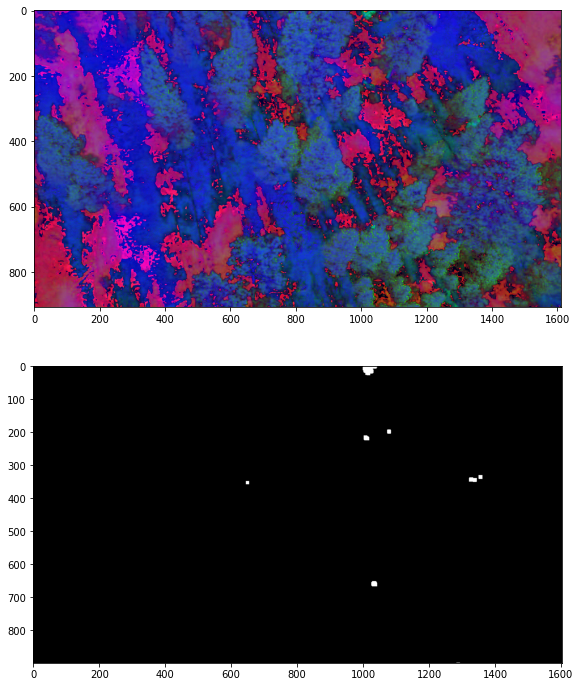

In [71]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(hsv.squeeze().permute(1,2,0).numpy())
plt.subplot(212)
plt.imshow(mask_dilated.permute(1,2,0).numpy())
plt.show()

In [85]:
img_tensor = torch.from_numpy(image)
img_tensor.shape

torch.Size([907, 1611, 3])

In [86]:
img_tensor = img_tensor.to(torch.float32)# .permute( 2,0,1 )

In [96]:
edge = nn.functional.pad(img_tensor, (1, 0, 1, 0))
edge = dilate(edge) - erode(edge)

In [97]:
edge = edge.numpy() #.permute(1,2,0).numpy()

In [73]:
# edge_normal = np.array( (edge -  np.min(edge) ) /( (np.max(edge) - np.min(edge))) * 255 , dtype = np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


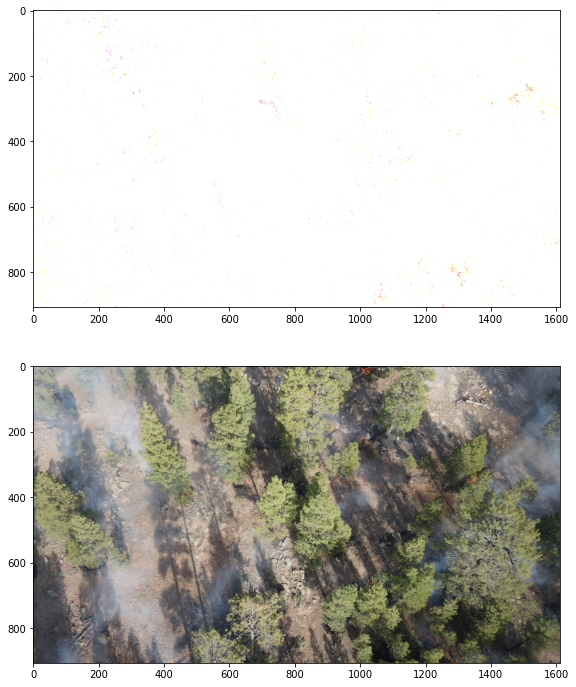

In [100]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(edge)
plt.subplot(212)
plt.imshow(pic_data)
plt.show()